# 2025-10-03 Singular Value Decomposition

* Cholesky $QR$

* Matrix norms and conditioning

* Geometry of the SVD

See the [FNC](https://fncbook.com/svd)

In [1]:
using LinearAlgebra
using Plots
using Polynomials
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

# Here's our Vandermonde matrix again
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

## Cholesky $QR$

The [**Cholesky decomposition**](https://en.wikipedia.org/wiki/Cholesky_decomposition) takes a [**Hermitian**](https://en.wikipedia.org/wiki/Hermitian_matrix), [**positive-definite**](https://en.wikipedia.org/wiki/Positive-definite_matrix) matrix and creates the lower triangular matrix $L$ such that $A = L L^T$ (more formally $A = L L^*$ where $L^*$ is the conjugate transpose, but we will stick to the real case here).

Consider the product $A^T A$.
Using the $QR$ factorization, we have

$$ A^T A = \left( Q R \right)^T Q R = R^T R $$

so we should be able to use $A^T A = L L^T = R^T R$ to find $R$ and then use $R$ to compute $Q$ as $Q = A L^{-T}$.

In [2]:
function qr_chol(A)
    # First one had loss of orthogonality
    R = cholesky(A' * A).U
    Q = A / R # Triangular solves are easy
    # So we Cholesky decompose twice
    R2 = cholesky(Q' * Q).U
    Q = Q / R2
    # Note, triangular * triangular = triangular
    R = R2 * R
    Q, R
end

x = LinRange(-1, 1, 15)
A = vander(x)
Q, R = qr_chol(A)
@show norm(Q' * Q - I)
@show norm(Q * R - A);

norm(Q' * Q - I) = 1.2262696169886244e-15
norm(Q * R - A) = 9.209900230881433e-16


## Condition number of a matrix

We may have informally referred to a matrix as "ill-conditioned" when the columns are nearly linearly dependent, but let's make this concept for precise.
Recall the definition of (relative) condition number:

$$ \kappa = \max_{\delta x} \frac{|\delta f|/|f|}{|\delta x|/|x|} $$

We understood this definition for scalar problems, but it also makes sense when the inputs and/or outputs are vectors (or matrices, etc.) and absolute value is replaced by vector (or matrix) norms.
Consider matrix-vector multiplication, for which $f \left( x \right) = A x$.

$$ \kappa \left( A \right) = \max_{\delta x} \frac{\lVert A \left( x + \delta x \right) - A x \rVert/\lVert A x \rVert}{\lVert \delta x\rVert/\lVert x \rVert}
= \max_{\delta x} \frac{\lVert A \delta x \rVert}{\lVert \delta x \rVert} \, \frac{\lVert x \rVert}{\lVert A x \rVert} = \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} $$

There are two problems here:

* We have $\kappa \left( A \right)$ but this value depends upon $x$

* What is $\left\lvert \left\lvert A \right\rvert \right\rvert$?

## Matrix norms induced by vector norms

Vector norms are built into the linear space (and defined in term of the inner product).
Matrix norms are induced by vector norms, according to

$$ \lVert A \rVert = \max_{x \ne 0} \frac{\lVert A x \rVert}{\lVert x \rVert} $$

This equation makes sense for non-square matrices - the vector norms of the input and output spaces may differ.
Due to linearity, all that matters is direction of $x$, so this could equivalently be written $\lVert A \rVert = \max_{\lVert x \rVert = 1} \lVert A x \rVert$.

Consider the matrix

$$ \begin{split} A = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} \end{split} $$

* What is the norm of this matrix?

* What is the condition number when $x = \left[ 1, 0 \right]^T$?

* What is the condition number when $x = \left[ 0, 1 \right]^T$?

## Conditioning of matrix-vector product

The condition number of matrix-vector multiplication depends on the vector.
The condition number of the matrix is the worst case (maximum) of the condition number for any vector, i.e.

$$ \kappa \left( A \right) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert x \rVert}{\lVert A x \rVert} $$

If $A$ is invertible, then we can rephrase as

$$ \kappa \left( A \right) = \max_{x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} \left( A x \right) \rVert}{\lVert A x \rVert} =
\max_{A x \ne 0} \lVert A \rVert \frac{\lVert A^{-1} \left( A x \right) \rVert}{\lVert A x \rVert} = \lVert A \rVert \lVert A^{-1} \rVert $$

Evidently multiplying by a matrix is just as ill-conditioned of an operation as solving a linear system using that matrix.

## Least squares and the normal equations

A least squares problem takes the form: given an $m \times n$ matrix $A$ ($m \geq n$), find $x$ such that

$$ \left\lvert \left\lvert A x - b \right\rvert \right\rvert $$

is minimized.
If $A$ is square and full rank, then this minimizer will satisfy $A x - b = 0$, but that is not the case in general because $b$ may not be in the range of $A$.
The residual $A x - b$ must be orthogonal to the range of $A$.

* Is this the same as saying $A^T \left( A x - b \right) = 0$?

* If $Q R = A$, is it the same as $Q^T \left( A x - b \right) = 0$?

$Q Q^T$ is an orthogonal projector onto the range of $Q$.
If $Q R = A$, then 

$$ Q Q^T \left( A x - b \right) = Q Q^T \left( Q R x - b \right) = Q \left( Q^T Q \right) R x - Q Q^T b = Q R x - Q Q^T b = A x - Q Q^T b $$

So if $b$ is in the range of $A$, we can solve $A x = b$.
If not, we need only *orthogonally* project $b$ into the range of $A$.

### Solution by $QR$ (Householder)

Solve $R x = Q^T b$.

* $QR$ factorization costs $2 m n^2 - \frac{2}{3} n^3$ operations and is done once per matrix $A$

* Computing $Q^T b$ costs $4 \left( m - n \right) n + 2 n^2 = 4 m n - 2 n^2$ (using elementary reflectors, which are stable and lower storage than naive storage of $Q$)

* Solving with $R$ costs $n^2$ operations, making total cost per $b$ thus $4 m n - n^2$

### Solution by Cholesky

The mathematically equivalent form $A^T A x = A^T b$ are called the **normal equations**.
The solution process involves factoring the symmetric and positive definite $n \times n$ matrix $A^T A$.

* Computing $A^T A$ costs $m n^2$ FLOPs (exploit symmetry)

* Factoring $A^T A = R^T R$ costs $\frac{1}{3} n^3$ FLOPs, for a total of $m n^2 + \frac{1}{3} n^3$

* Computing $A^T b$ costs $2 m n$

* Solving with $R^T$ costs $n^2$

* Solving with $R$ costs $n^2$ for a total cost per $b$ of $2 m n + 2 n^2$

The product $A^T A$ is ill-conditioned, $\kappa \left( A^T A \right) = \kappa \left( A \right)^2$, which can reduce the accuracy of a least squares solution.

### Solution by Singular Value Decomposition

Next, we will consider the factorization

$$ U \Sigma V^T = A $$

where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal with non-negative entries.
The entries of $\Sigma$ are called **singular values** and this decomposition is called the [**singular value decomposition**](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD).
It may remind you of an eigenvalue decomposition $X \Lambda X^{-1} = A$, but

* the SVD exists for all matrices (including non-square and deficient matrices)

* $U$ and $V$ have orthogonal columns (while $X$ can be arbitrarily ill-conditioned)

In fact, if a matrix is symmetric and positive definite (all positive eigenvalues), then $U = V$ and $\Sigma = \Lambda$.

For this algorithm

* Computing an SVD requires a somewhat complicated iterative algorithm, but a crude estimate of the cost is $2 m n^2 + 11 n^3$ (Similar to $QR$ when $m \gg n$ but much more expensive for square matrices)

* Computing $U^T b$ costs $2 m n$

* Solving with the diagonal matrix $\Sigma$ costs $n$

* Applying $V$ costs $2 n^2$ for a total cost per $b$ of $2 m n + 2 n^2$

## Geometry of the SVD

In [3]:
default(aspect_ratio=:equal)

# Let's use the peanut blob again
function peanut()
    theta = LinRange(0, 2*pi, 50)
    r = 1 .+ .4*sin.(3*theta) + .6*sin.(2*theta)
    r' .* [cos.(theta) sin.(theta)]'
end

# and a perfect circle
function circle()
    theta = LinRange(0, 2*pi, 50)
    [cos.(theta) sin.(theta)]'
end

function Aplot(A)
    "Plot a transformation from X to Y"
    X = peanut()
    Y = A * X
    p = scatter(X[1,:], X[2,:], label="in")
    scatter!(p, Y[1,:], Y[2,:], label="out")
    X = circle()
    Y = A * X
    q = scatter(X[1,:], X[2,:], label="in")
    scatter!(q, Y[1,:], Y[2,:], label="out")
    plot(p, q, layout=2)
end

Aplot (generic function with 1 method)

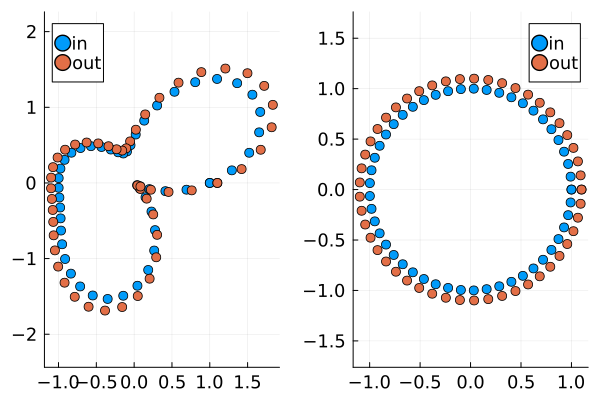

In [4]:
Aplot(1.1*I)

### Diagonal matrices

The simplest transformation may be a scalar multiple of the identity matrix.

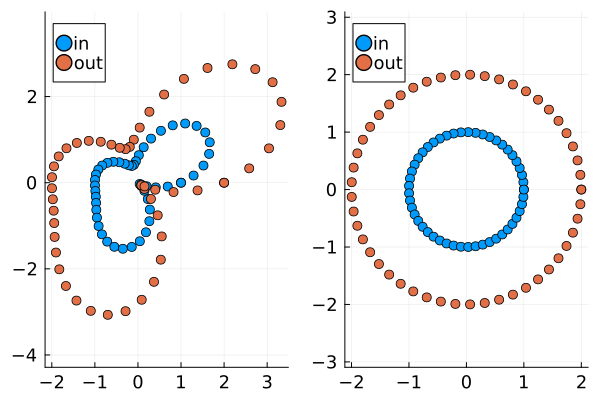

In [5]:
Aplot([2 0; 0 2])

The entries on the diagonal can be of different sizes.

$$ \begin{split} A = \begin{bmatrix} 2 & 0 \\ 0 & .5 \end{bmatrix}\end{split} $$

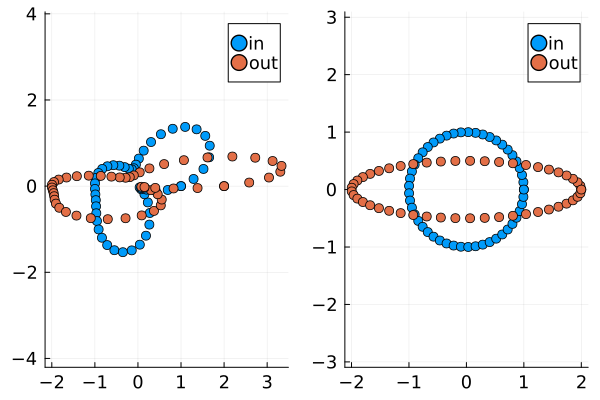

In [6]:
Aplot([2 0; 0 .5])

The circles become an **elipse** that is aligned with the coordinate axis but stretches differently in each direction based upon the entries on the diagonal.

### Given Rotation (orthogonal matrix example)

We can rotate the input using a $2 \times 2$ matrix, parameterized by $\theta$.
Its transpose rotates in the opposite direction.

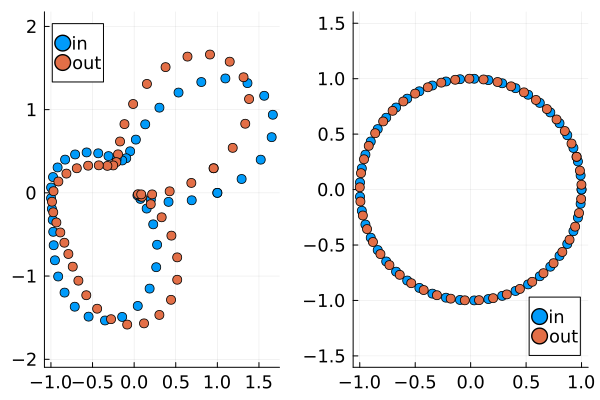

In [7]:
function givens(theta)
    s = sin(theta)
    c = cos(theta)
    [c -s; s c]
end

G = givens(0.3)
Aplot(G)

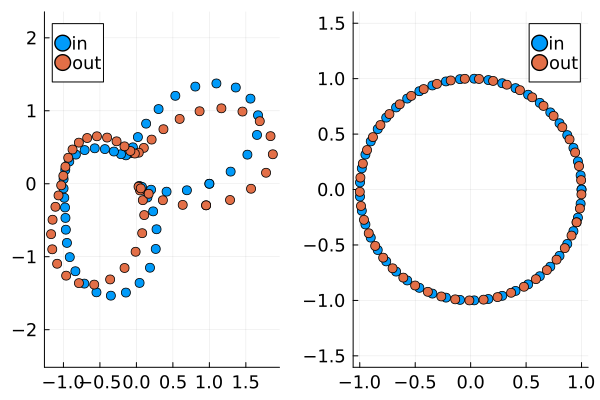

In [8]:
Aplot(G')

### Reflection

We've previously seen that reflectors have the form $F = I - 2 v v^T$ where $v$ is a normalized vector.
Reflectors satisfy $F^T F = I$ and $F = F^T$, so $F^2 = I$.

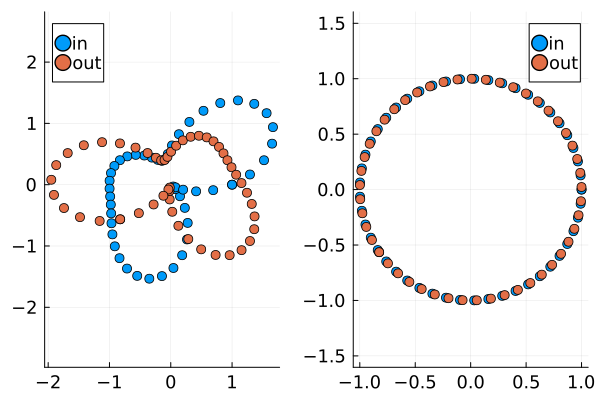

In [9]:
function reflect(theta)
    v = [cos(theta), sin(theta)]
    I - 2 * v * v'
end

Aplot(reflect(0.3))

## Singular Value Decomposition

The SVD is $A = U \Sigma V^T$ where $U$ and $V$ have orthonormal columns and $\Sigma$ is diagonal with non-negative entries.
It exists for any matrix (non-square, singular, etc.).

If we think of orthogonal matrices as reflections/rotations, this says that any matrix can be represented as reflect/rotate, diagonally scale, and reflect/rotate again.

Let's try a random symmetric matrix.

det(A) = -2.0087262739014657


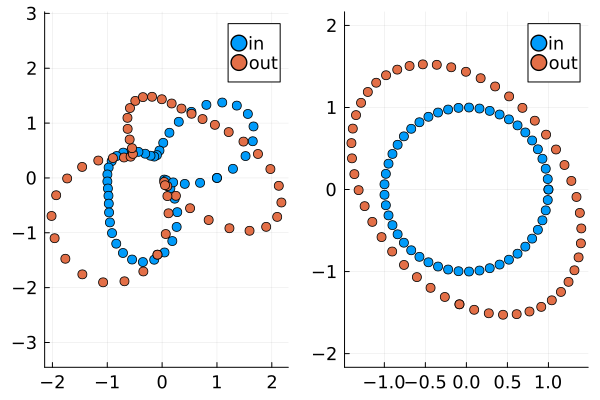

In [10]:
A = randn(2, 2)
A += A' # make symmetric
@show det(A) # Positive means orientation is preserved
Aplot(A)

In [11]:
U, S, V = svd(A)
@show norm(U * diagm(S) * V' - A) # Should be zero

norm(U * diagm(S) * V' - A) = 4.443059973708341e-16


4.443059973708341e-16

### Parts of the SVD

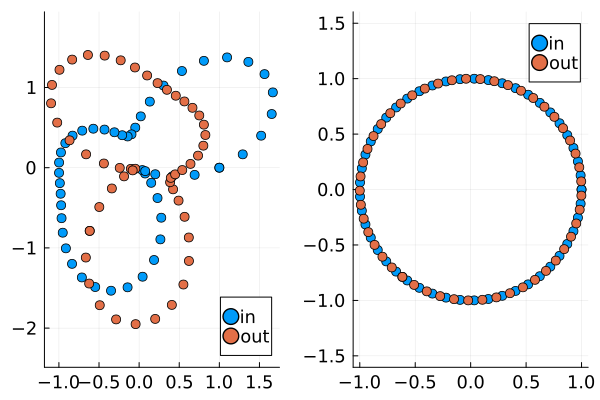

In [12]:
# Rotate/reflect in preparation for scaling
Aplot(V')

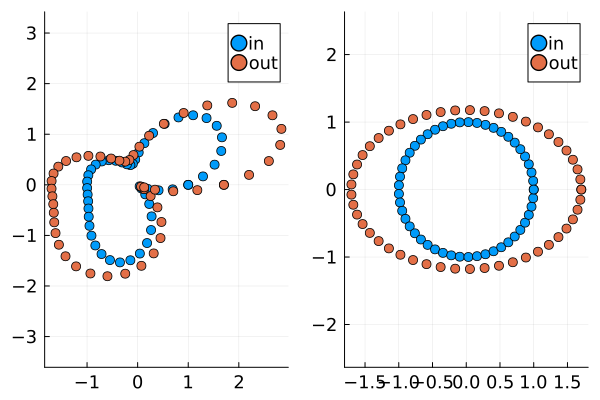

In [13]:
# Scale along axes
Aplot(diagm(S))

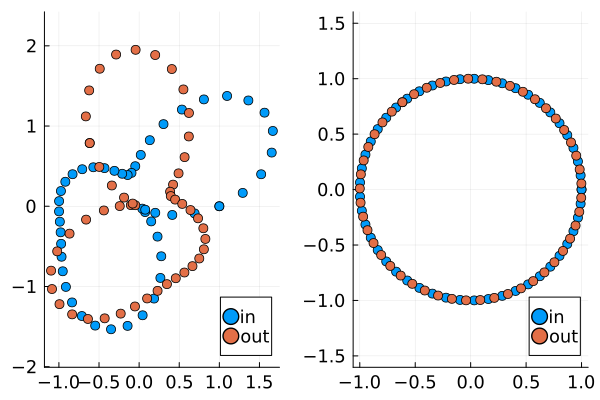

In [14]:
# Rotate/reflect back
Aplot(U)

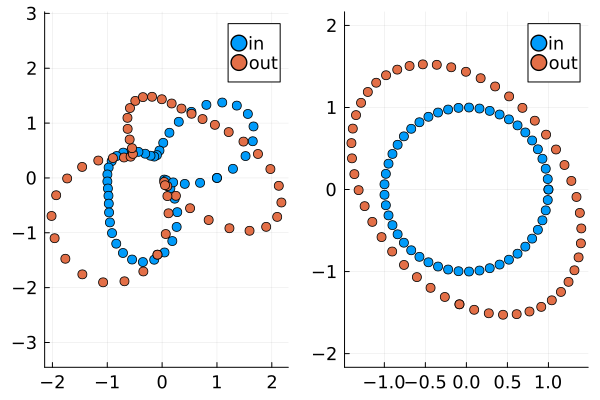

In [15]:
# And all together
Aplot(U * diagm(S) * V')

### Observations

* The circle always maps to an ellipse

* The $U$ and $V$ factors may reflect even when $\text{det} \left( A \right) > 0$